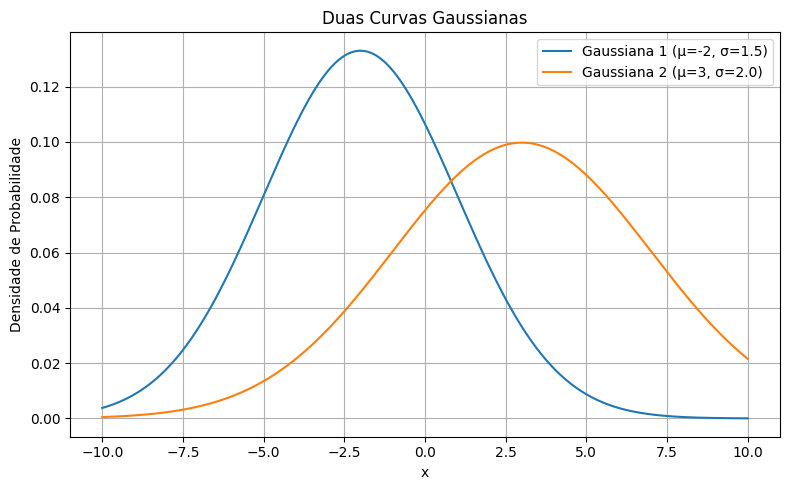

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Eixo x
x = np.linspace(-10, 10, 400)

# Parâmetros das gaussianas
mu1, sigma1 = -2, 3   # média e desvio padrão da 1ª
mu2, sigma2 = 3, 4    # média e desvio padrão da 2ª

# Densidades de probabilidade
g1 = (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
g2 = (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, g1, label='Gaussiana 1 (μ=-2, σ=1.5)')
plt.plot(x, g2, label='Gaussiana 2 (μ=3, σ=2.0)')
plt.title('Duas Curvas Gaussianas')
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('duas_gaussianas.png')   # Salva o arquivo
plt.show()

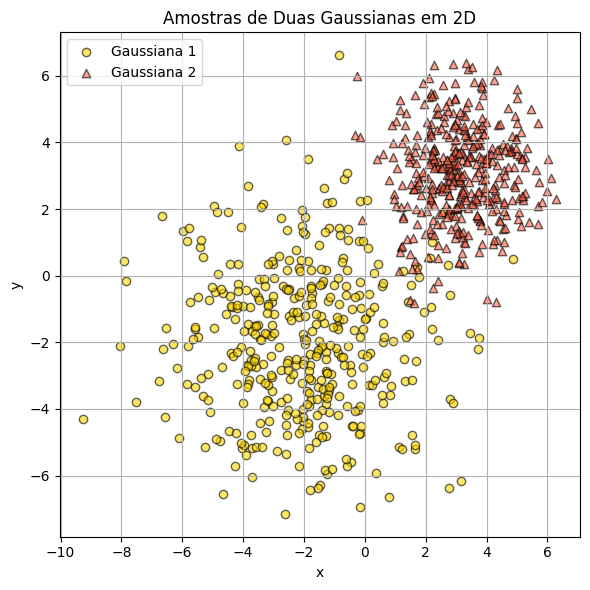

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Gerar amostras de 2 Gaussianas
# ---------------------------
np.random.seed(42)                                # reprodutibilidade

mean1 = [-2, -2]                                 # média da 1ª gaussiana
cov1  = [[5, 0],                             # matriz de covariância
         [0, 5]]

mean2 = [3, 3]                                   # média da 2ª gaussiana
cov2  = [[1.7, 0],
         [0, 1.7]]

n_samples = 400
samples1 = np.random.multivariate_normal(mean1, cov1, n_samples)
samples2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# ---------------------------
# Plotar pontos
# ---------------------------
plt.figure(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1],
            color="gold", edgecolor="k", alpha=0.6, label="Gaussiana 1")
plt.scatter(samples2[:, 0], samples2[:, 1],
            color="tomato", marker="^", edgecolor="k", alpha=0.6, label="Gaussiana 2")

plt.title("Amostras de Duas Gaussianas em 2D")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Salvar (opcional)
plt.savefig("duas_gaussianas_2D.png", dpi=150)
plt.show()


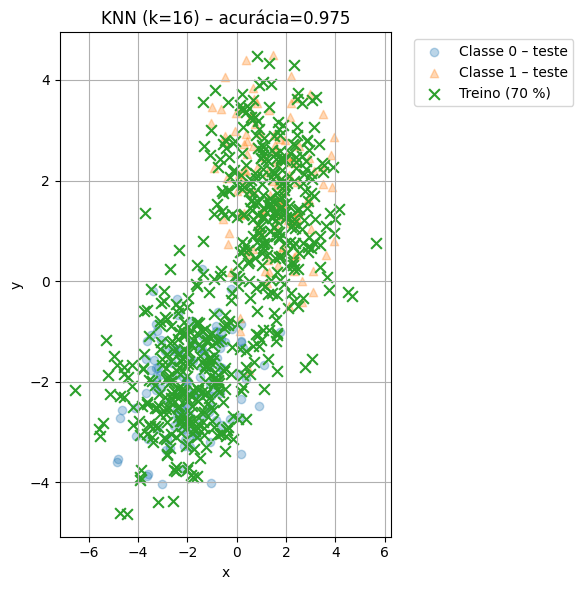

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Gerar dados
np.random.seed(42)
mean1, cov1 = [-2, -2], [[2.0, 0.3], [0.3, 1.0]]
mean2, cov2 = [1.5, 1.5],   [[1.5, -0.4], [-0.4, 1.5]]
n = 400
X = np.vstack([
    np.random.multivariate_normal(mean1, cov1, n),
    np.random.multivariate_normal(mean2, cov2, n)
])
y = np.hstack((np.zeros(n), np.ones(n)))

# 70 % treino, 30 % teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

# KNN
k = 16
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
            alpha=0.3, label="Classe 0 – teste")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
            marker='^', alpha=0.3, label="Classe 1 – teste")
plt.scatter(X_train[:, 0], X_train[:, 1],
            marker='x', s=60, label="Treino (70 %)")
plt.title(f"KNN (k={k}) – acurácia={acc}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("gaussianas_knn_70train.png", dpi=150)
plt.show()


In [ ]:
acc

0.9958333333333333

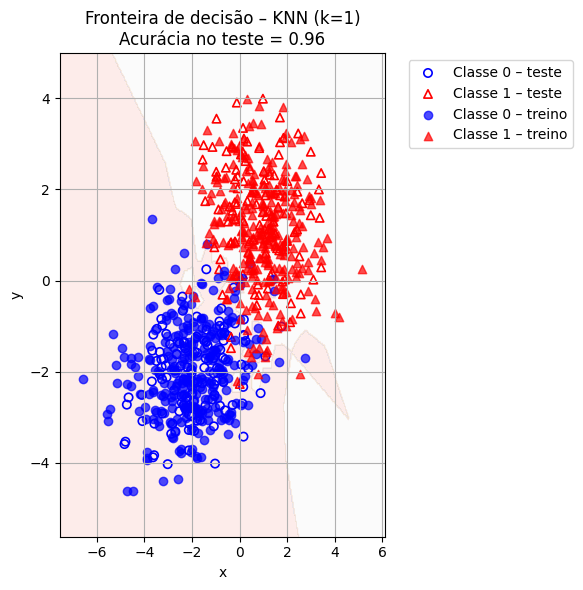

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1) Gerar duas gaussianas 2-D
np.random.seed(42)
mean1, cov1 = [-2, -2], [[2.0, 0.3], [0.3, 1.0]]
mean2, cov2 = [1, 1],   [[1.5, -0.4], [-0.4, 1.5]]
n = 400
X = np.vstack([
    np.random.multivariate_normal(mean1, cov1, n),
    np.random.multivariate_normal(mean2, cov2, n)
])
y = np.hstack([np.zeros(n), np.ones(n)])

# 2) Split 70 % treino / 30 % teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

# 3) Treinar K-NN
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)

# 4) Fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='Pastel1')  # regiões de decisão

# ---- PONTOS DE TESTE ----
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1],
            marker='o', facecolors='none', edgecolors='blue', linewidths=1.2,
            label='Classe 0 – teste')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1],
            marker='^', facecolors='none', edgecolors='red', linewidths=1.2,
            label='Classe 1 – teste')

# ---- PONTOS DE TREINO ----
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1],
            marker='o', color='blue', alpha=0.7, label='Classe 0 – treino')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1],
            marker='^', color='red',  alpha=0.7, label='Classe 1 – treino')

plt.title(f'Fronteira de decisão – KNN (k={k})\nAcurácia no teste = {acc:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("gaussianas_knn_decision_shapes.png", dpi=150)
plt.show()



In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1) Carregar o conjunto Iris
iris = load_iris()
X, y = iris.data, iris.target            # quatro atributos + rótulos
target_names = iris.target_names         # ['setosa', 'versicolor', 'virginica']

# 2) Separar 70 % treino / 30 % teste (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.70, stratify=y, random_state=42
)

# 3) Instanciar e treinar K-NN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 4) Prever no conjunto de teste
y_pred = knn.predict(X_test)

# 5) Avaliar desempenho
acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)

# 6) Exibir resultados
print(f"Acurácia no teste: {acc:.2f}\n")
df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)
print("Matriz de confusão:")
print(df_cm)


Acurácia no teste: 0.98

Matriz de confusão:
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          15          0
virginica        0           1         14


In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Acurácia SEM normalização: 0.517
Acurácia COM normalização: 1.000


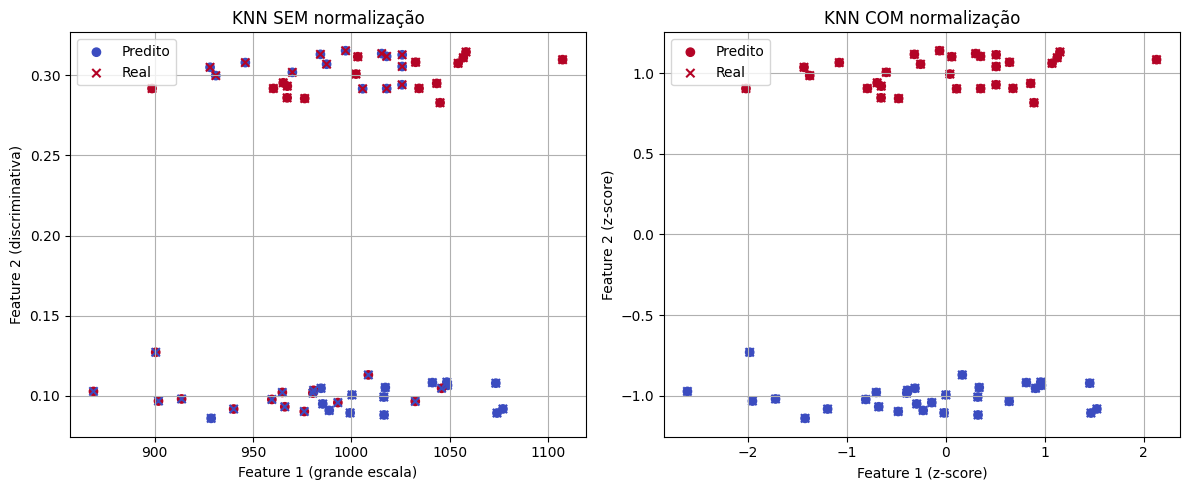

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Gerar dados: a feature 1 é inútil mas com escala grande, a feature 2 é útil mas pequena
np.random.seed(42)

# Classe 0
class_0 = np.hstack([
    np.random.normal(1000, 50, (100, 1)),   # Feature irrelevante (domina sem normalização)
    np.random.normal(0.1, 0.01, (100, 1))   # Feature relevante
])

# Classe 1
class_1 = np.hstack([
    np.random.normal(1000, 50, (100, 1)),
    np.random.normal(0.3, 0.01, (100, 1))
])

# Conjunto completo
X = np.vstack([class_0, class_1])
y = np.array([0]*100 + [1]*100)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# KNN sem normalização
knn_raw = KNeighborsClassifier(n_neighbors=3)
knn_raw.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, knn_raw.predict(X_test))

# KNN com normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

# Resultados
print(f"Acurácia SEM normalização: {acc_raw:.3f}")
print(f"Acurácia COM normalização: {acc_scaled:.3f}")

# Visualização
plt.figure(figsize=(12, 5))

# Sem normalização
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_raw.predict(X_test), cmap='coolwarm', marker='o', label='Predito')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Real')
plt.title("KNN SEM normalização")
plt.xlabel("Feature 1 (grande escala)")
plt.ylabel("Feature 2 (discriminativa)")
plt.legend()
plt.grid(True)

# Com normalização
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=knn_scaled.predict(X_test_scaled), cmap='coolwarm', marker='o', label='Predito')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Real')
plt.title("KNN COM normalização")
plt.xlabel("Feature 1 (z-score)")
plt.ylabel("Feature 2 (z-score)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_true = [0, 1, 1, 1, 0, 1, 0, 0]
y_pred = [0, 1, 0, 1, 0, 1, 1, 0]

print(classification_report(y_true, y_pred, target_names=["Negativo", "Positivo"]))


              precision    recall  f1-score   support

    Negativo       0.75      0.75      0.75         4
    Positivo       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



MSE: 819166429.5218289
R²: 0.8746291081535261


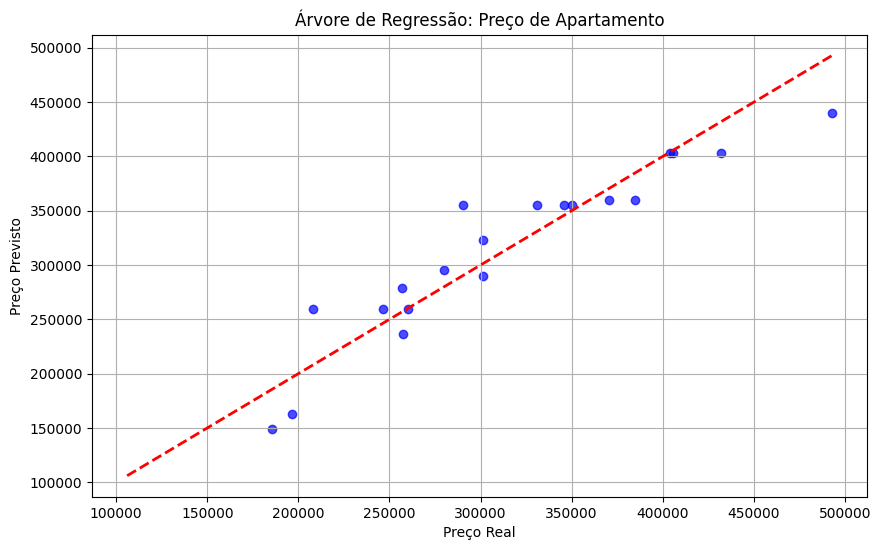

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Gerar dados fictícios
np.random.seed(0)
n = 100
data = pd.DataFrame({
    'area_m2': np.random.randint(40, 150, size=n),
    'andar': np.random.randint(1, 20, size=n),
    'quartos': np.random.randint(1, 5, size=n),
    'idade_anos': np.random.randint(0, 30, size=n)
})

# Preço médio (simulado com alguma regra + ruído)
data['preco_medio'] = (
    3000 * data['area_m2'] +
    10000 * data['quartos'] -
    500 * data['idade_anos'] +
    1500 * data['andar'] +
    np.random.normal(0, 20000, size=n)
)

# Separar X e y
X = data[['area_m2', 'andar', 'quartos', 'idade_anos']]
y = data['preco_medio']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criar e treinar o modelo
model = DecisionTreeRegressor(max_depth=5, random_state=0)
model.fit(X_train, y_train)

# Prever no teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Plotar resultado real vs previsto
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Árvore de Regressão: Preço de Apartamento")
plt.grid(True)
plt.show()


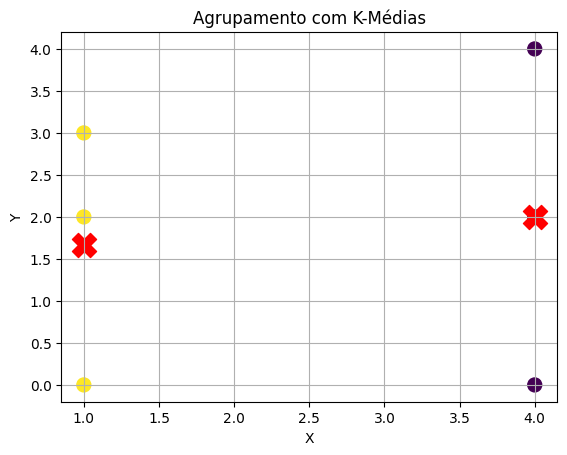

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Dados fictícios
X = np.array([[1, 2], [1, 3], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Aplicando K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualização
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='X', c='red')
plt.title("Agrupamento com K-Médias")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.6590000392852929


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# X: dados, labels: rótulos obtidos por KMeans ou outro
print("Silhouette Score:", silhouette_score(X, labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X, labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X, labels))


Silhouette Score: 0.6590000392852929
Davies-Bouldin Index: 0.4843175866468539
Calinski-Harabasz Index: 1558.9993353116613


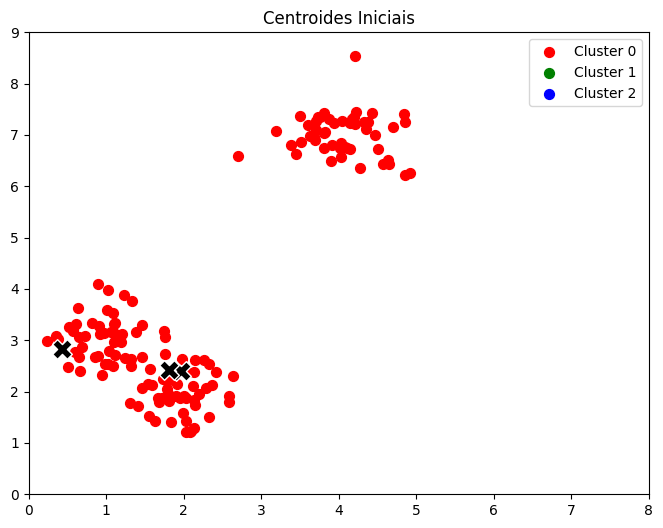

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 1. Gerar dados simulados
np.random.seed(42)
X1 = np.random.normal([2, 2], 0.4, size=(50, 2))
X2 = np.random.normal([1, 3], 0.4, size=(50, 2))
X3 = np.random.normal([4, 7], 0.4, size=(50, 2))
X = np.vstack((X1, X2, X3))

# 2. Inicialização
K = 3
n_iter = 4
colors = ['red', 'green', 'blue']
random_idx = np.random.choice(len(X), K, replace=False)
centroids = X[random_idx]

history_centroids = [centroids.copy()]
history_labels = []

# 3. Função de uma iteração
def kmeans_step(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([
        X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]
        for k in range(K)
    ])
    return new_centroids, labels

# 4. Executar iterações
for _ in range(n_iter):
    centroids, labels = kmeans_step(X, centroids)
    history_centroids.append(centroids.copy())
    history_labels.append(labels.copy())

# 5. Criar animação
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    if frame == 0:
        ax.set_title("Centroides Iniciais")
        labels = np.zeros(len(X), dtype=int)
    else:
        labels = history_labels[frame - 1]
        ax.set_title(f"Iteração {frame}")

    centroids = history_centroids[frame]
    for k in range(K):
        ax.scatter(
            X[labels == k][:, 0], X[labels == k][:, 1],
            s=50, color=colors[k], label=f'Cluster {k}'
        )
        ax.scatter(
            centroids[k, 0], centroids[k, 1],
            s=200, color='black', marker='X', edgecolor='white'
        )
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 9)
    ax.legend(loc='upper right')

ani = FuncAnimation(fig, update, frames=n_iter + 1, interval=1000, repeat=False)


HTML(ani.to_jshtml())
